In [3]:
import pandas as pd
import os

#Zet hier de address link waar de train en test data opgeslagen is
#hier wordt de gegenereerde data ook naartoe geëxporteerd
Dir = 'C:\\Users\\arnoa\\MINOR DATA SCIENCE\\Kaggle'

os.chdir(Dir)

In [4]:
#Laad de data in
DataSetTrain = pd.read_csv('train.csv', sep=',')
DataSetTest = pd.read_csv('test.csv', sep=',')

In [5]:
#Voeg de kolom 'Survived' toe aan de test set
DataSetTest['Survived'] = 0
DataSetTest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [6]:
ProbabilitySex = DataSetTrain[["Sex", "Survived"]]
cross = pd.crosstab(ProbabilitySex.Survived, ProbabilitySex.Sex, normalize = True)
cross

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


In [7]:
f1 = round(cross.iloc[1, 0] / (cross.iloc[0, 0] + cross.iloc[1, 0]) * 100, 2)
f0 = 100 - f1
m1 = round(cross.iloc[1, 1] / (cross.iloc[0, 1] + cross.iloc[1, 1]) * 100, 2)
m0 = 100 - m1

percSurv = pd.DataFrame(
    {"female (%)" : [f0, f1],
     "male (%)"   : [m0, m1]},
     index = [0, 1])
percSurv

,female (%),male (%)
0,25.8,81.11
1,74.2,18.89


We verwachten dat leeftijd ook een belangrijke rol zal spelen. We maken een nieuwe dataset aan met per leeftijd het percentage overlevenden

In [8]:
agesurvived = DataSetTrain[DataSetTrain["Survived"] == 1]
agesurvived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [9]:
import numpy as np
df = pd.DataFrame([], columns=['Age', 'Survived'])

for i in range(80):
    if ((np.count_nonzero(DataSetTrain["Age"] == i+1) == 0)):
        survRel = 0
    else:
        survRel = (np.count_nonzero(agesurvived["Age"] == i+1)/np.count_nonzero(DataSetTrain["Age"] == i+1))*100
    df2 = pd.DataFrame([[i+1, survRel]], columns=('Age', 'Survived'))
    df = df.append(df2)

D:\PROGRAMS\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\PROGRAMS\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


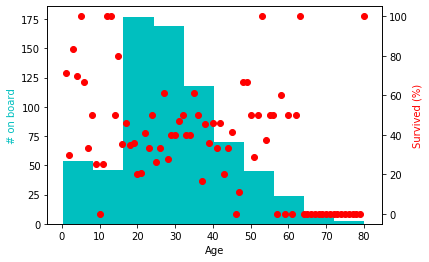

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(DataSetTrain["Age"], color = 'c')
ax.set_xlabel("Age")
ax.set_ylabel("# on board", color = 'c')
ax2 = ax.twinx()
ax2.scatter(df.Age, df.Survived, color = 'r')
ax2.set_ylabel("Survived (%)", color = 'r')

plt.show()

In [11]:
import numpy as np
#We kiezen voor de categoriën 0-17, 18-34, 35+
#we vewachten dat kinderen over het algemeen sneller gered worden
#Vanaf 35+ zijn er minder mensen aan boord, de samplesize wordt dus kleiner
#vanaf 35 ben je oud en ga je dood

DataSetTrain.loc[DataSetTrain.Age < 18, "Agecat"] = "low"
DataSetTrain.loc[np.logical_and(DataSetTrain.Age >= 18, DataSetTrain.Age < 35), "Agecat"] = "mid"
DataSetTrain.loc[DataSetTrain.Age >= 35, "Agecat"] = "high"

DataSetTest.loc[DataSetTest.Age < 18, "Agecat"] = "low"
DataSetTest.loc[np.logical_and(DataSetTest.Age >= 18, DataSetTest.Age < 35), "Agecat"] = "mid"
DataSetTest.loc[DataSetTest.Age >= 35, "Agecat"] = "high"

In [12]:
from sklearn.ensemble import RandomForestClassifier

y = DataSetTrain["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Agecat"]
X = pd.get_dummies(DataSetTrain[features])
X_test = pd.get_dummies(DataSetTest[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': DataSetTest.PassengerId, 'Survived': predictions})
output.to_csv('my_submission7.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
